# 異常検知②

[Anomaly Detection Toolkit (ADTK)](https://adtk.readthedocs.io/en/stable/index.html)を使った異常検知をしてみます。
多次元の人工データに対して異常検知を適用します。

In [3]:
import numpy as np
import pandas as pd
from adtk.data import validate_series

s_train = pd.read_csv("./training.csv", index_col="timestamp", parse_dates=True)
s_train = validate_series(s_train)
s_train["value2"] = s_train["value"].apply(lambda v: np.sin(v) + np.cos(v))
s_train

,value,value2
timestamp,,
2014-04-01 00:00:00,18.090486,0.037230
2014-04-01 00:05:00,20.359843,1.058643
2014-04-01 00:10:00,21.105470,0.141581
2014-04-01 00:15:00,21.151585,0.076564
2014-04-01 00:20:00,18.137141,0.103122
...,...,...
2014-04-14 23:35:00,18.269290,0.288071
2014-04-14 23:40:00,19.087351,1.207420
2014-04-14 23:45:00,19.594689,1.413067


array([<Axes: >, <Axes: >], dtype=object)

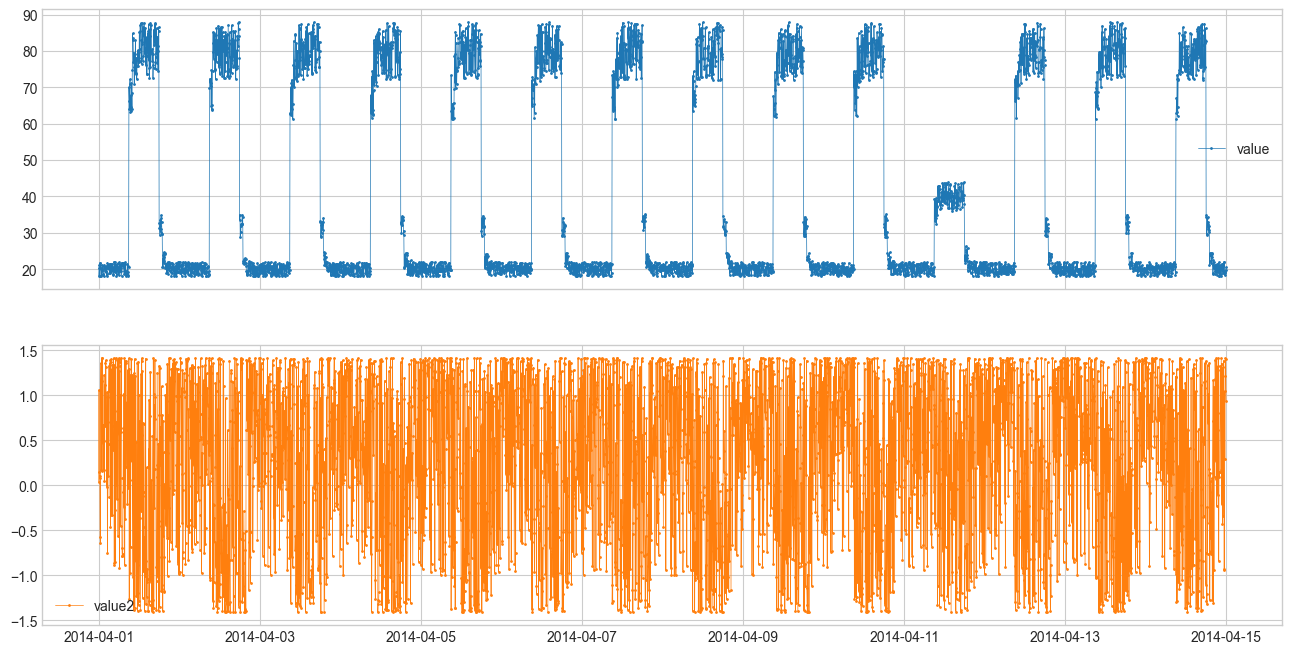

In [4]:
from adtk.visualization import plot

plot(s_train)

## 異常検知
[SeasonalAD](https://adtk.readthedocs.io/en/stable/notebooks/demo.html?highlight=SeasonalAD#SeasonalAD)を用いた異常検知を行います。他の手法は[Detector](https://adtk.readthedocs.io/en/stable/notebooks/demo.html?highlight=SeasonalAD#Detector)を参照してください。

c:\Users\nanja-win-ms\miniconda3\envs\py39\lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


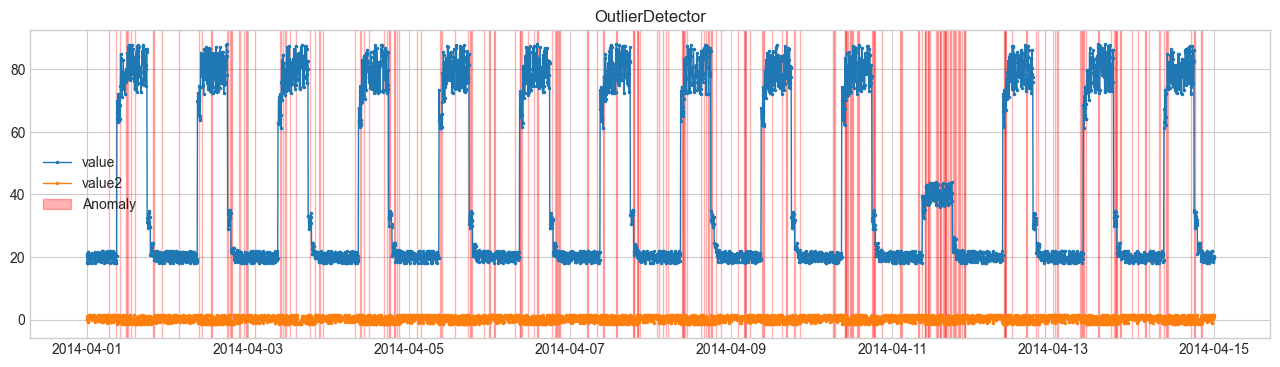

c:\Users\nanja-win-ms\miniconda3\envs\py39\lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


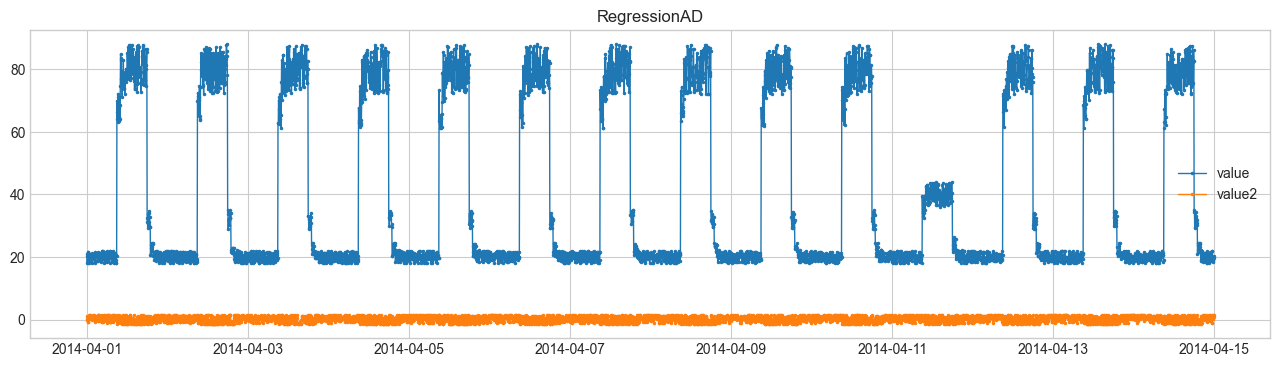

c:\Users\nanja-win-ms\miniconda3\envs\py39\lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


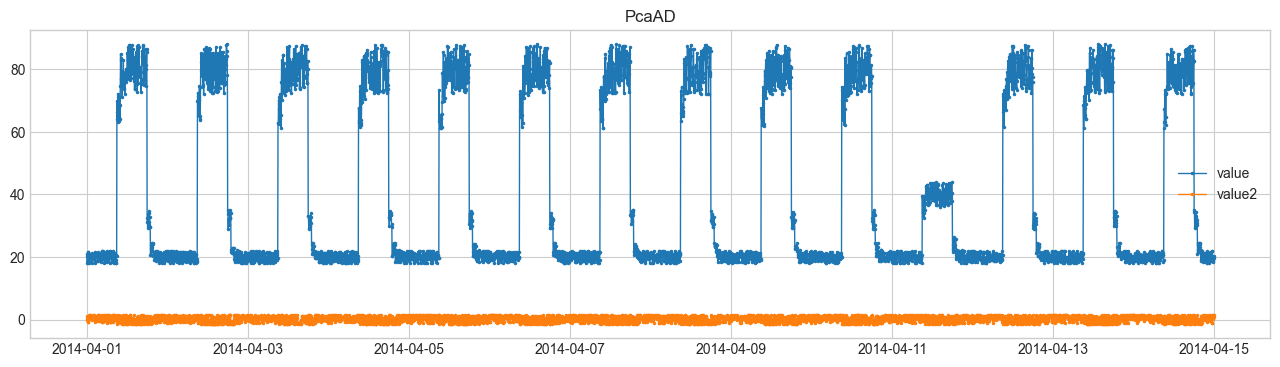

In [15]:
import matplotlib.pyplot as plt
from adtk.detector import OutlierDetector, PcaAD, RegressionAD
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor

model_dict = {
    "OutlierDetector": OutlierDetector(LocalOutlierFactor(contamination=0.05)),
    "RegressionAD": RegressionAD(regressor=LinearRegression(), target="value2", c=3.0),
    "PcaAD": PcaAD(k=2),
}

for model_name, model in model_dict.items():
    anomalies = model.fit_detect(s_train)

    plot(
        s_train,
        anomaly=anomalies,
        ts_linewidth=1,
        ts_markersize=3,
        anomaly_color="red",
        anomaly_alpha=0.3,
        curve_group="all",
    )
    plt.title(model_name)
    plt.show()